In [1]:
import sys; sys.path.insert(0, '../../..'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


# cut selection in a selected  box dimensions for $\frac{\Delta Q_{track}}{\Delta Q_{total}}$ 

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/DetectionObservables/VertexActivity/CutSelection/'

In [3]:
N_box_sizes = 30
MinNwiresBox,dNwiresBox = 5,5
MinNticksBox,dNticksBox = 10,10
NwiresBox,NticksBox=[],[]
for i_box_size in range(N_box_sizes):
    NwiresBox.append(MinNwiresBox + i_box_size * dNwiresBox)
    NticksBox.append(MinNticksBox + i_box_size * dNticksBox) 

In [4]:
i_box_size = 9
box_dims = '[%d wires x %d ticks]'%(NwiresBox[i_box_size],NticksBox[i_box_size])
print 'optimal box dimensions:',box_dims
Ru = 'RdQaroundVertex[plane 0]'+box_dims
Rv = 'RdQaroundVertex[plane 1]'+box_dims
Ry = 'RdQaroundVertex[plane 2]'+box_dims

optimal box dimensions: [50 wires x 100 ticks]


# pairs of 2-tracks at close proximity

In [5]:
versions['overlay date'] = '2018_05_11'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
OverlayPairsFV,OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')
# MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()

283762 pairs from MC-BNB + cosmic DATA overlay
186485 pairs in FV
49707 are 1mu-1p, 26.7%
41519 are other pairs, 22.3%
95259 are cosmic, 51.1%
--------------------------------------------------------------
23996 are CC 1p 0pi, 12.9%


In [6]:
# cuts_pureff = apply_cuts_MCbnbDATAcosmic()
# pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers = cuts_pureff
# pureff_MCbnbDATAcosmic
cuts_order  = ['no cut','Chi2Proton','Nflashes','MatchedFlash','length','non-collinearity']
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.7%,100.0%,12.9%,no cut,100.0% (49707),100.0% (41519),100.0% (95259),100.0% (23996)
Chi2Proton,63.1%,70.7%,68.7%,37.1%,Chi2Proton,63.1% (31389),19.3% (8021),5.2% (5001),68.7% (16481)
Nflashes,62.9%,72.6%,68.4%,38.1%,Nflashes,62.9% (31245),19.2% (7982),4.0% (3820),68.4% (16406)
MatchedFlash,51.6%,78.1%,56.3%,41.2%,MatchedFlash,51.6% (25634),13.2% (5491),1.8% (1688),56.3% (13510)
length,47.2%,83.5%,52.5%,44.8%,length,47.2% (23459),7.9% (3281),1.4% (1369),52.5% (12600)
non-collinearity,43.1%,87.4%,49.7%,48.7%,non-collinearity,43.1% (21412),5.8% (2409),0.7% (673),49.7% (11926)


# A cut on \RdQ for the optimized box dimensions

In [8]:
RdQ_xyz, RdQ_3D_array = dict(), dict()
for i_pair_type in range(4):
    pair_type = pair_types[i_pair_type]; color=MCcolors[i_pair_type]; label=MClabels[i_pair_type]; 
    sample = reducedOverlay['non-collinearity'][pair_type]
    u,v,y = sample[Ru], sample[Rv], sample[Ry]
    RdQ_xyz[pair_type] = (u,v,y)
    RdQ_3D_array[pair_type] = np.array([[x_p,y_p,z_p] for x_p,y_p,z_p in zip(u,v,y)])
    print "created a 3D array for",pair_type

created a 3D array for 1mu-1p
created a 3D array for other pairs
created a 3D array for cosmic
created a 3D array for CC 1p 0pi


# find the optimal cut

## first draw the distribution of \RdQ\ in all three planes for all samples

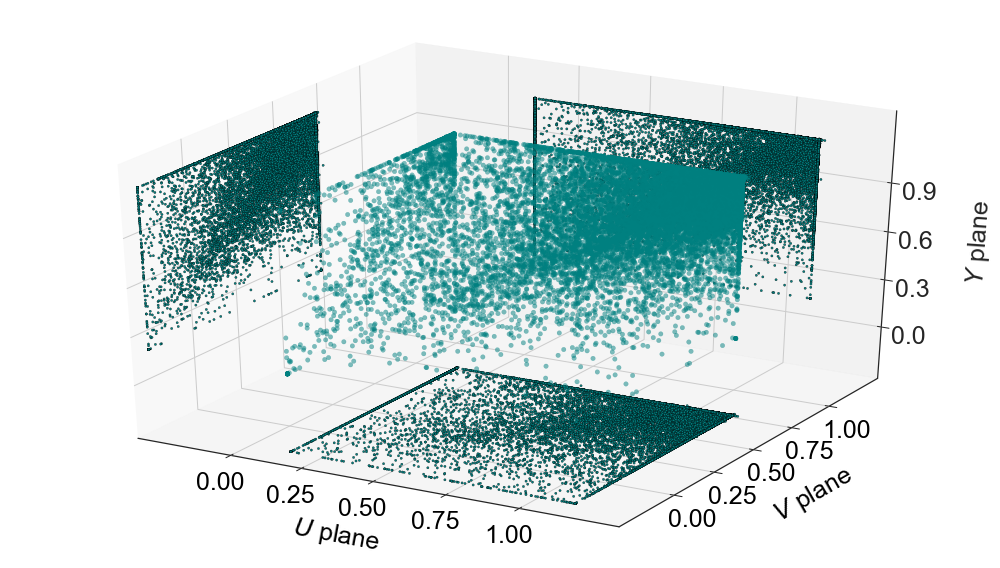

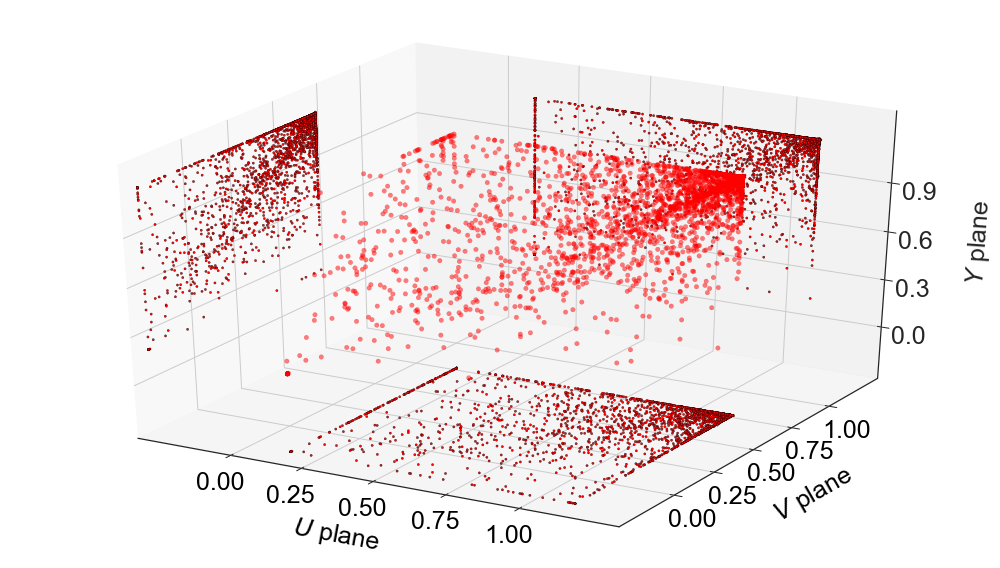

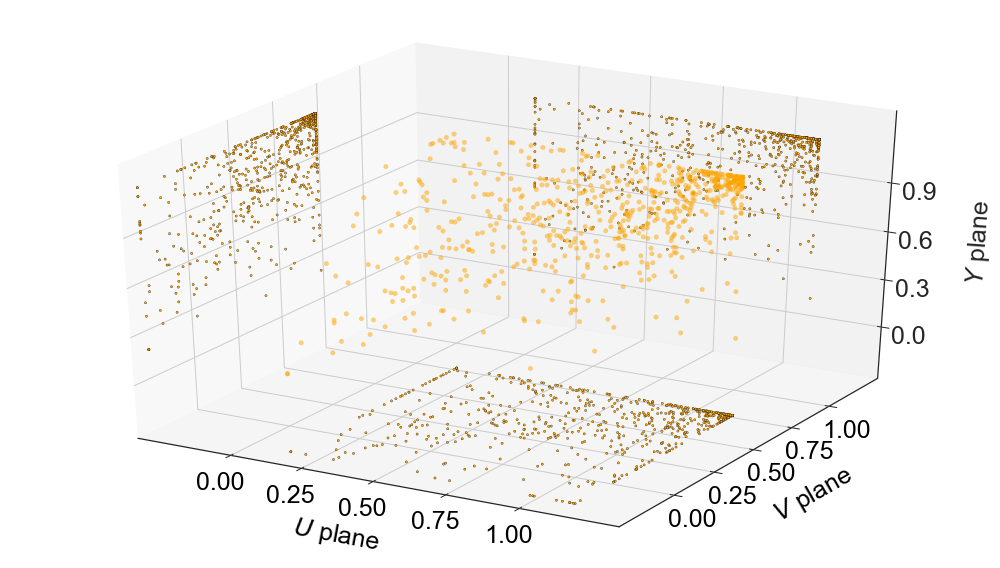

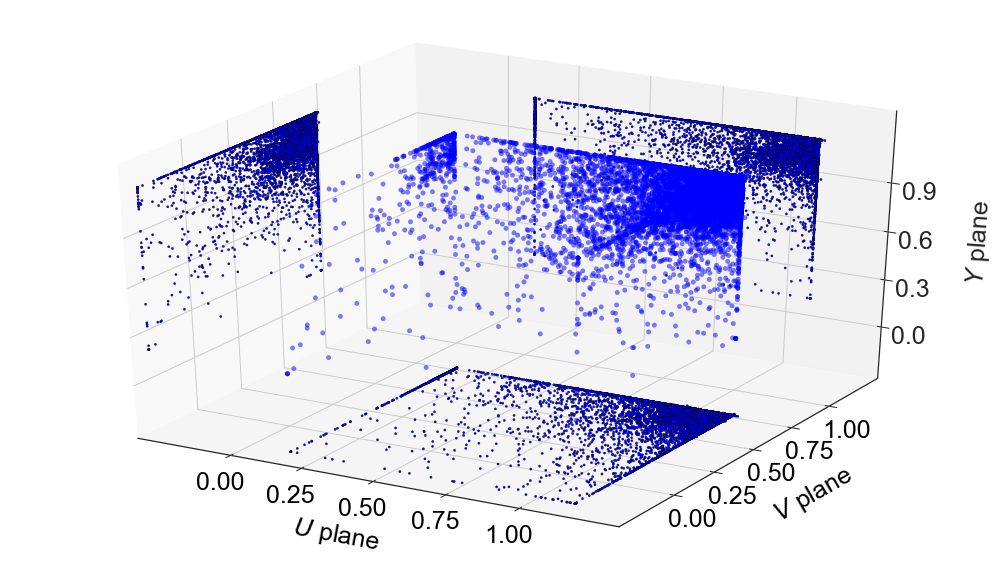

In [9]:
for i_pair_type in range(4):
    pair_type = pair_types[i_pair_type]; color=MCcolors[i_pair_type]; label=MClabels[i_pair_type]
    sample = reducedOverlay['non-collinearity'][pair_type]
    u,v,y = sample[Ru], sample[Rv], sample[Ry]
    fig3D = plt.figure(figsize=(14,8)).gca(projection='3d')
    fig3D.scatter( u , v , y , c=color, s=20 , alpha=0.5 )
    fig3D.scatter(u, y, color=color, zdir='y', s=5, zs=1.5 , edgecolors='black') 
    fig3D.scatter(v, y, color=color, zdir='x', s=5, zs=-0.5 , edgecolors='black')
    fig3D.scatter(u, v, color=color, zdir='z', s=5, zs=-0.5 , edgecolors='black')
    fig3D.set_xlim(-0.3,1.3);fig3D.set_ylim(-0.3,1.3);fig3D.set_zlim(-0.3,1.3)
    set_axes(fig3D,x_label='$U$ plane',y_label='$V$ plane',z_label='$Y$ plane'
             ,xticks=[0,0.25,0.5,0.75,1],yticks=[0,0.25,0.5,0.75,1],zticks=[0,0.3,0.6,0.9])
    fig3D.xaxis.labelpad = 30 ; fig3D.yaxis.labelpad = 30 ; fig3D.zaxis.labelpad = 30
    plt.tight_layout()
    plt.savefig(figures_path + 'ChosenBoxDimensions_pairtype_%d.pdf'%i_pair_type)

## try a cut in a sphere centered around 1 - select its radius
## + add all those events with R=1 in either of the planes

In [12]:
def pureff_in_RdQ_sphere(radius=None, i_optimal_box_size=9, debug=0):    
    '''
    return: 
            purity,efficiency of µp
    also:   purity,efficiency of CC1p0π
    '''
    if debug>1: print 'computing impact of cut on optimal box dimensions: (%d wires x %d ticks)'%(NwiresBox[i_optimal_box_size],NticksBox[i_optimal_box_size])
    box_dims = '[%d wires x %d ticks]'%(NwiresBox[i_optimal_box_size],NticksBox[i_optimal_box_size])
    Ru = 'RdQaroundVertex[plane 0]'+box_dims
    Rv = 'RdQaroundVertex[plane 1]'+box_dims
    Ry = 'RdQaroundVertex[plane 2]'+box_dims
    reduced = dict()
    for pair_type in pair_types:
        sam = reducedOverlay['non-collinearity'][pair_type]
        reduced[pair_type] = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                                 | 
                                 (np.sqrt( np.square(sam[Ru]-1) + np.square(sam[Rv]-1) + np.square(sam[Ry]-1) ) <= radius) 
                                ]
    eff_mup,pur_mup,eff_CC1p0pi,pur_CC1p0pi = get_pureff_MCbnbDATAcosmic_cut(cut_name='vertex activity', reduced_MCbnbDATAcosmic=reduced)
    if debug:
        print "radius:",radius
        print "eff_mup,pur_mup,(eff_mup*pur_mup):",eff_mup,pur_mup,(eff_mup*pur_mup)
        print "pur_CC1p0pi,eff_CC1p0pi,(eff_CC1p0pi*pur_CC1p0pi):",pur_CC1p0pi,eff_CC1p0pi,(eff_CC1p0pi*pur_CC1p0pi)
    return eff_mup,pur_mup,eff_CC1p0pi,pur_CC1p0pi

# for MC bnb + MC cosmic replace with:
#         sam = reduced_MCbnbMCcosmicSamples['closest-flash dYZ'][pair_type]        
#         reduced[pair_type] = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
#                                  | 
#                                  (np.sqrt( np.square(sam[Ru]-1) + np.square(sam[Rv]-1) + np.square(sam[Ry]-1) ) <= radius) 
#                                 ]
#     eff_mup,pur_mup,eff_CC1p0pi,pur_CC1p0pi = get_pureff_MCbnbMCcosmic_cut(cut_name='vertex activity', reduced_MCbnbMCcosmic=reduced)

In [13]:
debug=0
radius_array = np.linspace(.1,1,100)
pureff_mup,pureff_CC1p0p = [],[]
for i_radius,radius in enumerate(radius_array):
    if (i_radius%(10)==0): print 'i_radius:',i_radius
    eff_mup,pur_mup,eff_CC1p0pi,pur_CC1p0pi = pureff_in_RdQ_sphere(radius=radius,
                                                                   i_optimal_box_size=i_box_size, 
                                                                   debug=debug)
    pureff_mup.append(eff_mup*pur_mup)
    pureff_CC1p0p.append(eff_CC1p0pi*pur_CC1p0pi)

print 'done'

i_radius: 0
i_radius: 10
i_radius: 20
i_radius: 30
i_radius: 40
i_radius: 50
i_radius: 60
i_radius: 70
i_radius: 80
i_radius: 90
done


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:15: RankWarning: Polyfit may be poorly conditioned


r_max: 0.395495495495
$r_max \simeq 0.390000$


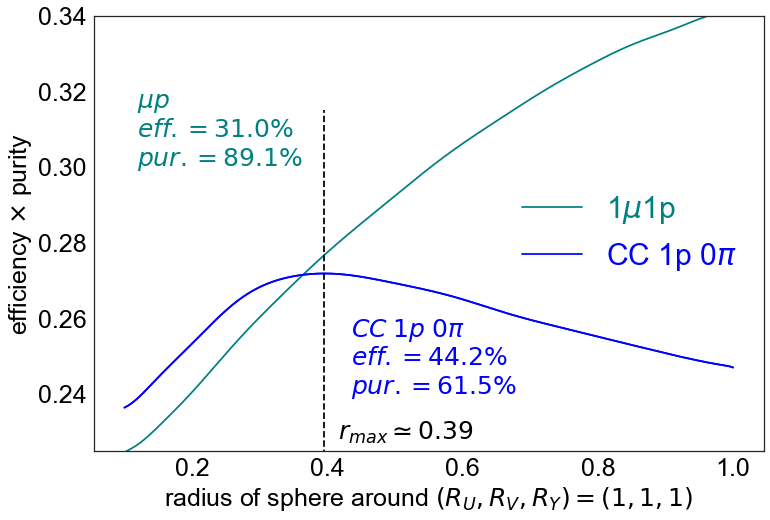

In [23]:
fig,ax=plt.subplots(figsize=(12,8))
for i_pair_type,pureff in zip([0,3],[pureff_mup,pureff_CC1p0p]):
    x = radius_array
    y = np.array(pureff)*1e-4
#     plt.plot(radius_array, y ,color=MCcolors[i_pair_type],label=MClabels[i_pair_type])
    popt = np.polyfit( x, y , 20)
    poly = np.poly1d(popt)
    x_poly = np.linspace(.1,1,1000)
    y_poly = poly(x_poly)
    plt.plot(x_poly, y_poly ,color=MCcolors[i_pair_type],label=MClabels[i_pair_type])

x = radius_array
y = np.array(pureff)*1e-4

popt = np.polyfit( x, y , 20)
poly = np.poly1d(popt)
x_poly = np.linspace(.1,1,1000)
y_poly = poly(x_poly)
plt.plot(x_poly, y_poly ,color=MCcolors[i_pair_type],label=MClabels[i_pair_type])

# best point
i_max = np.argmax(y_poly)
# i_max = 20
r_max = x_poly[i_max]
print 'r_max:',r_max
r_max_rounded = float(np.floor( np.int(100.*r_max) ))/100
print r'$r_max \simeq %f$'%r_max_rounded

plt.plot([r_max,r_max],[np.min(ax.get_xlim()),0.315],'--',color='black')
eff_mup,pur_mup,eff_CC1p0pi,pur_CC1p0pi = pureff_in_RdQ_sphere(radius=r_max_rounded, i_optimal_box_size=9, debug=0)

plt.text(1.05*r_max,0.228,'$r_{max}\simeq%.2f$'%r_max_rounded,fontsize=25 ,color='black')
plt.text(1.1*r_max,0.24,'$CC\;1p\;0\pi$\n$eff.=%.1f'%eff_CC1p0pi+'\%$'+'\n$pur.=%.1f'%pur_CC1p0pi+'\%$',fontsize=25 ,color=MCcolors[3])
plt.text(0.3*r_max,0.30,'$\mu p$\n$eff.=%.1f'%eff_mup+'\%$'+'\n$pur.=%.1f'%pur_mup+'\%$',fontsize=25 ,color=MCcolors[0])

set_axes(ax,'radius of sphere around $(R_U,R_V,R_Y)=(1,1,1)$',r'efficiency $\times$ purity'
         ,ylim=(0.225,0.34)
        )
# colored legend
leg = plt.legend(fontsize=30,loc='center right')
for text,color in zip(leg.get_texts(),[MCcolors[0],MCcolors[3]]): text.set_color(color)
plt.savefig(figures_path+'cut_optimization_rRdQ.pdf')

## now draw the distributions of \RdQ\ in all three planes for all samples with the cut

# now try a cut on a box close to 1 (minimal R for U/V/Y)

In [8]:
def draw_plane_projections_box(axes=None , RuMin=None , RvMin=None , RyMin=None ,color='red'):
    '''
    draw the projections of the 3D box
    RuMin<Ru<1,RvMin<Rv<1,RyMin<Ry<1
    onto the xy/xz/yz 2D planes
     '''
    if RuMin>0.99: RuMin=0.99
    if RvMin>0.99: RvMin=0.99
    if RyMin>0.99: RyMin=0.99
    # Z=0 plane
    axes.plot( [RuMin,1.01], [RvMin,RvMin] , color=color, zdir='z', zs=-0.5 )
    axes.plot( [RuMin,1.01], [1.01,1.01] , color=color, zdir='z', zs=-0.5 )
    axes.plot( [RuMin,RuMin], [RvMin,1.01] , color=color, zdir='z', zs=-0.5 )
    axes.plot( [1.01,1.01], [RvMin,1.01] , color=color, zdir='z', zs=-0.5 )
    # Y=0 plane
    axes.plot( [RuMin,1.01], [RyMin,RyMin] , color=color, zdir='y', zs=1.5 ) 
    axes.plot( [RuMin,1.01], [1.01,1.01] , color=color, zdir='y', zs=1.5 ) 
    axes.plot( [RuMin,RuMin], [RyMin,1.01] , color=color, zdir='y', zs=1.5 ) 
    axes.plot( [1.01,1.01], [RyMin,1.01] , color=color, zdir='y', zs=1.5 ) 
    # X=0 plane
    axes.plot( [RvMin,1.01], [RyMin,RyMin] , color=color, zdir='x', zs=-0.5 ) 
    axes.plot( [RvMin,1.01], [1.01,1.01] , color=color, zdir='x', zs=-0.5 ) 
    axes.plot( [RvMin,RvMin], [RyMin,1.01] , color=color, zdir='x', zs=-0.5 ) 
    axes.plot( [1.01,1.01], [RyMin,1.01] , color=color, zdir='x', zs=-0.5 ) 

In [9]:
def pureff_in_RdQ_box(RuMin=None , RvMin=None , RyMin=None, i_optimal_box_size=9, debug=0):    
    # return purity*efficiency of µp-pairs
    if debug>1: print 'computing impact of cut on optimal box dimensions: (%d wires x %d ticks)'%(NwiresBox[i_optimal_box_size],NticksBox[i_optimal_box_size])
    Ru = 'RdQaroundVertex[plane 0][%d wires x %d ticks]'%(NwiresBox[i_optimal_box_size],NticksBox[i_optimal_box_size])
    Rv = 'RdQaroundVertex[plane 1][%d wires x %d ticks]'%(NwiresBox[i_optimal_box_size],NticksBox[i_optimal_box_size])
    Ry = 'RdQaroundVertex[plane 2][%d wires x %d ticks]'%(NwiresBox[i_optimal_box_size],NticksBox[i_optimal_box_size])    
    reduced = dict()
    for pair_type in pair_types:
        sam = reduced_MCsamples['$|\theta_{1,2}-90^0|<60^0$'][pair_type]
        reduced[pair_type] = sam[(sam[Ru]>RuMin)&(sam[Ru]<1.01)
                                 &(sam[Rv]>RvMin)&(sam[Rv]<1.01)
                                 &(sam[Ry]>RyMin)&(sam[Ry]<1.01)]
    eff_mup,pur_mup,eff_CC1p0pi,pur_CC1p0pi = get_pur_eff_cut(cut_name = 'vertex activity', reduced = reduced)
    if debug:
        print "RvMin, RvMin, RyMin:",RvMin, RvMin, RyMin
        print "eff_mup,pur_mup,(eff_mup*pur_mup):",eff_mup,pur_mup,(eff_mup*pur_mup)
        print "pur_CC1p0pi,eff_CC1p0pi,(eff_CC1p0pi*pur_CC1p0pi):",pur_CC1p0pi,eff_CC1p0pi,(eff_CC1p0pi*pur_CC1p0pi)

    return (eff_mup*pur_mup)

def pureff_in_RdQ_box_Ruv(RuvMin=0 , RyMin=0, i_optimal_box_size=9, debug=0): 
    return pureff_in_RdQ_box(RuMin=RuvMin , RvMin=RuvMin , RyMin=RyMin, i_optimal_box_size=i_optimal_box_size, debug=debug)

In [10]:
debug=1
RuvMin_array = np.linspace(.1,1,10)
RyMin_array = np.linspace(.1,1,10)
pureff = np.zeros((len(RuvMin_array),len(RyMin_array)))
for i_RuvMin,RuvMin in enumerate(RuvMin_array):
    if (i_RuvMin%(10)==0): print 'i_RuvMin:',i_RuvMin
    for i_RyMin,RyMin in enumerate(RyMin_array):
        fpureff = pureff_in_RdQ_box_Ruv(RuvMin=RuvMin, RyMin=RyMin,
                                                i_optimal_box_size=i_box_size, debug=debug )
        pureff[i_RuvMin][i_RyMin] = fpureff    
print 'done'

i_RuvMin: 0


NameError: name 'i_optimal_box_size' is not defined

In [13]:
RuMin_array = np.linspace(0.,1,50)
RvMin_array = np.linspace(0.,1,50)
RyMin_array = np.linspace(0.,1,50)
optimal_point = (0,0,0)
debug=0
optimal_pureff = 0
for i_RuMin,RuMin in enumerate(RuMin_array):
    if (i_RuMin%(10)==0): print 'i_RuMin:',i_RuMin
    for i_RvMin,RvMin in enumerate(RvMin_array):
        for i_RyMin,RyMin in enumerate(RyMin_array):
            fpureff = pureff_in_RdQ_box(RuMin=RuMin, RvMin=RvMin, RyMin=RyMin,
                                        i_optimal_box_size=i_box_size, debug=debug )
            if (fpureff>optimal_pureff):
                optimal_pureff=fpureff
                optimal_point = (RuMin,RvMin,RyMin)
                print 'new optimal point:',optimal_point,'(optimal_pureff=',optimal_pureff,')'
print 'done'

i_RuMin: 0
new optimal point: (0.0, 0.0, 0.0) (optimal_pureff= 4057.58975559 )
new optimal point: (0.0, 0.0, 0.020408163265306121) (optimal_pureff= 4058.74972979 )
new optimal point: (0.0, 0.0, 0.061224489795918366) (optimal_pureff= 4064.55781219 )
new optimal point: (0.0, 0.0, 0.081632653061224483) (optimal_pureff= 4066.89016303 )
new optimal point: (0.0, 0.020408163265306121, 0.081632653061224483) (optimal_pureff= 4068.06173961 )
new optimal point: (0.0, 0.040816326530612242, 0.0) (optimal_pureff= 4071.58987383 )
new optimal point: (0.0, 0.040816326530612242, 0.020408163265306121) (optimal_pureff= 4072.76290462 )
new optimal point: (0.0, 0.040816326530612242, 0.061224489795918366) (optimal_pureff= 4078.65621452 )
new optimal point: (0.0, 0.040816326530612242, 0.081632653061224483) (optimal_pureff= 4081.03474369 )
i_RuMin: 10
i_RuMin: 20
i_RuMin: 30
i_RuMin: 40
done


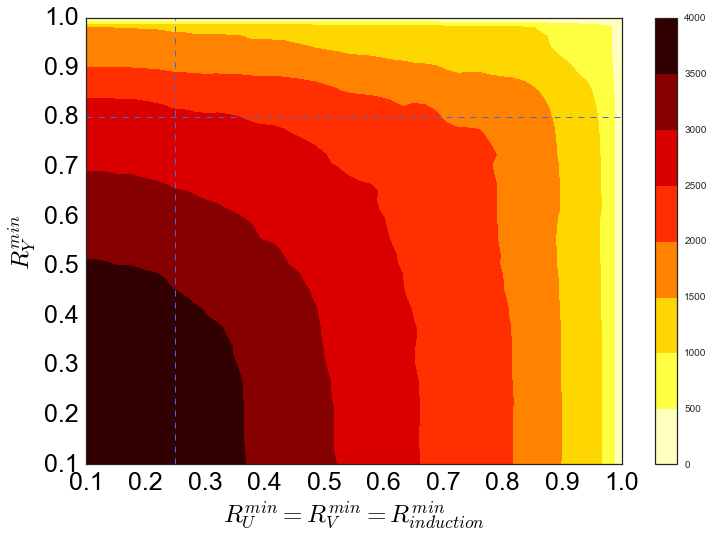

In [27]:
RuvMinBest,RyMinBest = .25,.8
# print pureff_CC1p0pi
fig,ax=plt.subplots(figsize=(12,8))
X,Y = np.meshgrid(RuvMin_array,RyMin_array)
plt.contourf( X , Y , pureff.T , cmap='hot_r' )
plt.plot([RuvMinBest,RuvMinBest],ax.get_ylim(),'--',color='royalblue',linewidth=1)
plt.plot(ax.get_xlim(),[RyMinBest,RyMinBest],'--',color='royalblue',linewidth=1)
plt.colorbar()
set_axes(ax,'$R_U^{min}=R_V^{min}=R_{induction}^{min}$','$R_Y^{min}$',do_add_grid=True)
plt.savefig(figures_path+'cut_optimization_Ruv_Ry.pdf')

In [15]:
RuMinBest,RvMinBest,RyMinBest = .025,.025,.1
pureff_in_RdQ_box(RuMin=RuMinBest,RvMin=RvMinBest, RyMin=RyMinBest,i_optimal_box_size=i_box_size, debug=2 )

computing impact of cut on optimal box dimensions: (50 wires x 100 ticks)
RvMin, RvMin, RyMin: 0.025 0.025 0.1
eff_mup,pur_mup,(eff_mup*pur_mup): 60.6712113267 66.8013856813 4052.92098759
pur_CC1p0pi,eff_CC1p0pi,(eff_CC1p0pi*pur_CC1p0pi): 23.5854503464 66.2074554295 1561.5326526


4052.920987585545

0.0

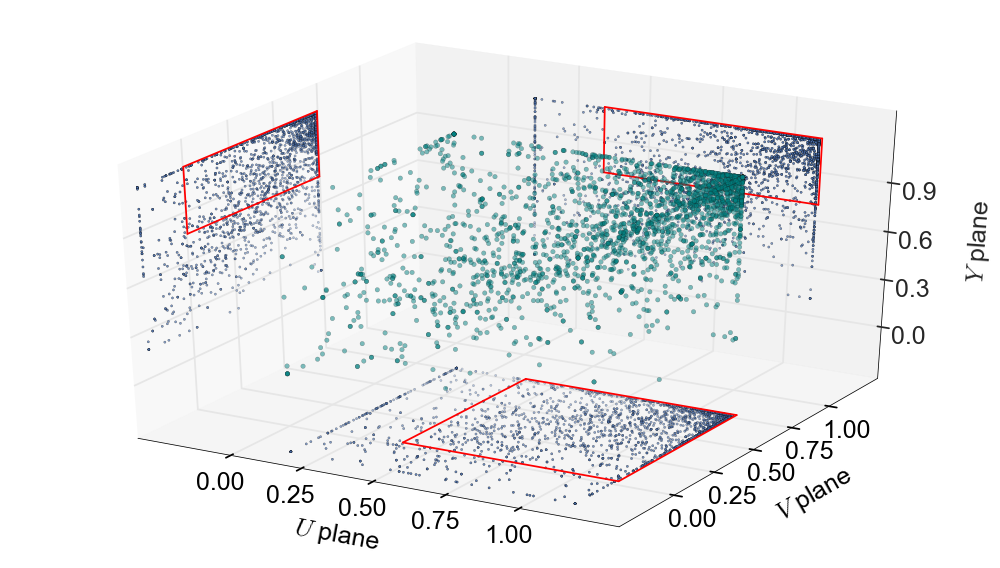

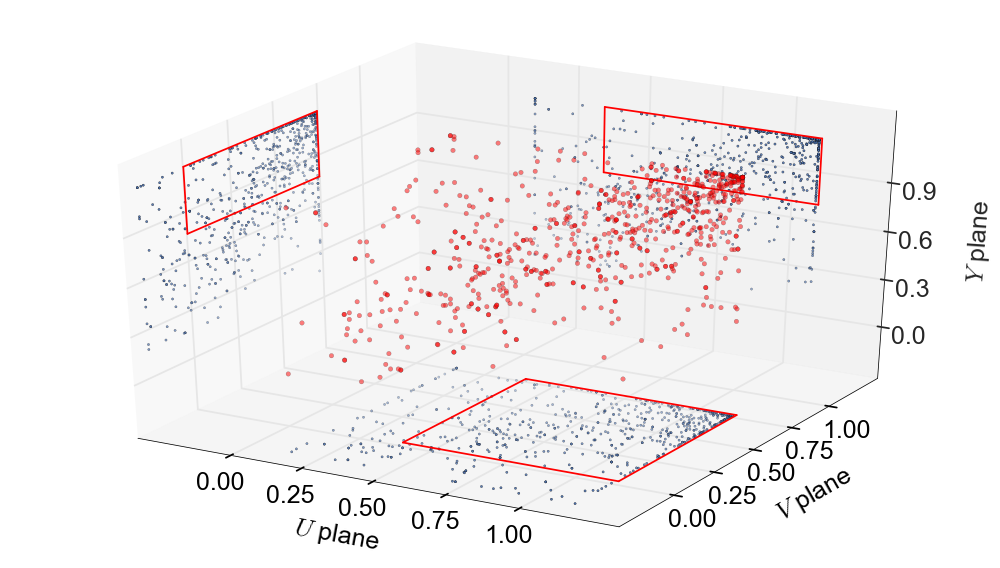

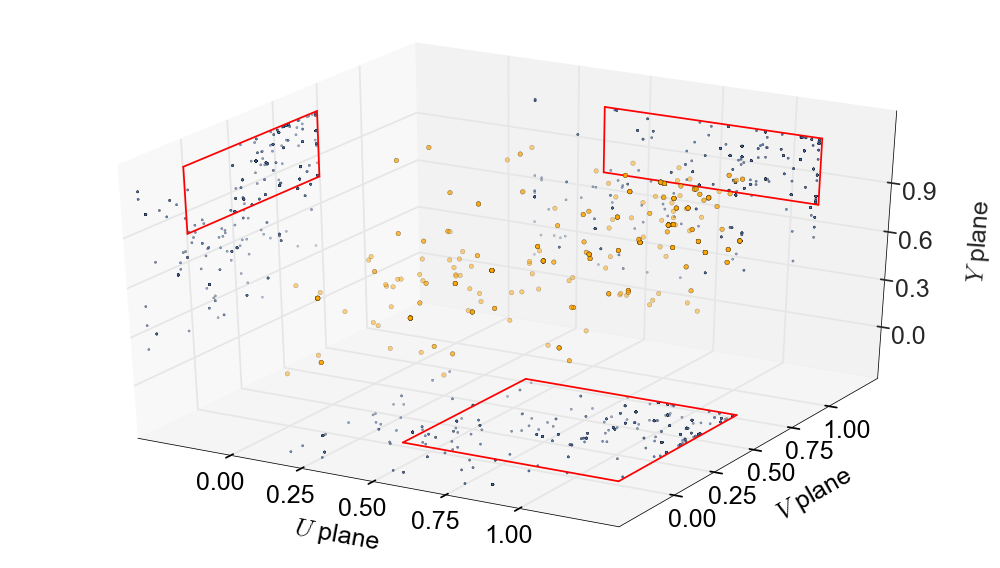

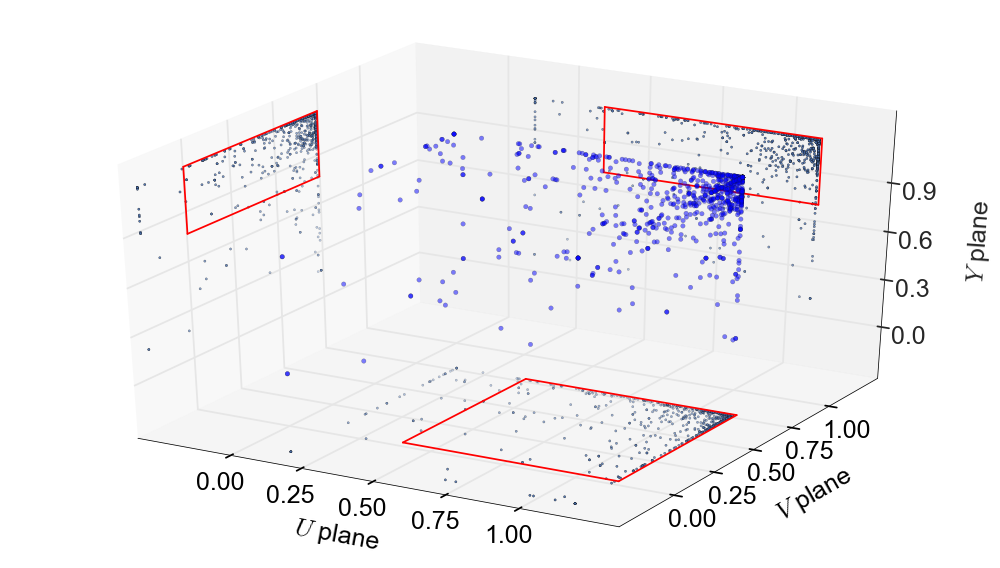

In [141]:
# optimal cut
RuvMinBest,RyMinBest = 0.25,0.6
# --- - - -- --- - -- --- 

for i_pair_type in range(4):
    pair_type = pair_types[i_pair_type]; color=colors[i_pair_type]; label=labels[i_pair_type]; sample = samples[pair_type]     
    x, y, z = RdQ_xyz[pair_type]
    fig3D = plt.figure(figsize=(14,8)).gca(projection='3d')
    fig3D.scatter( x , y , z , c=color, s=20 , alpha=0.5 )
    fig3D.scatter(x, z, color=color, zdir='y', s=5, zs=1.5 , edgecolors='black') 
    fig3D.scatter(y, z, color=color, zdir='x', s=5, zs=-0.5 , edgecolors='black')
    fig3D.scatter(x, y, color=color, zdir='z', s=5, zs=-0.5 , edgecolors='black')
    
    fig3D.set_xlim(-0.3,1.3);fig3D.set_ylim(-0.3,1.3);fig3D.set_zlim(-0.3,1.3)
    set_axes(fig3D,x_label='$U$ plane',y_label='$V$ plane',z_label='$Y$ plane'
             ,xticks=[0,0.25,0.5,0.75,1],yticks=[0,0.25,0.5,0.75,1],zticks=[0,0.3,0.6,0.9])
    fig3D.xaxis.labelpad = 30 ; fig3D.yaxis.labelpad = 30 ; fig3D.zaxis.labelpad = 30
    plt.tight_layout()
    draw_plane_projections_box(axes=fig3D , RuMin=RuvMinBest , RvMin=RuvMinBest , RyMin=RyMinBest,color='red')
    plt.savefig(figures_path + 'ChosenBoxDimensions_pairtype_%d.pdf'%i_pair_type)
pureff_in_RdQ_box_Ruv(RuvMin=RuvMin, RyMin=RyMin,i_optimal_box_size=i_optimal_box_size, debug=debug )

## a cut in the shape of a plane 

In [8]:
def draw_plane_projections(axes=None , a_x=None , a_y=None , a_0=None ,color='black'):
    '''
    draw the projections of the 3D plane
    z = a_0 + a_x*x + a_y*y 
    onto the xy/xz/yz 2D planes
     '''
    if a_x==0: a_x=0.01
    if a_y==0: a_y=0.01
        
    # for z=0 the plane is y = (-1/a_y)*(a_0 + a_x * x)
    x = np.linspace((-a_y-a_0)/a_x,1,100)
    axes.plot(x, (-1./a_y)*(a_0 + a_x * x), color=color, zdir='z', zs=-0.5 )
    
    # for y=0 the plane is z = a_0 + a_x * x
    x = np.linspace((1-a_0)/a_x,1,100)
    axes.plot(x, a_0 + a_x * x, color=color, zdir='y', zs=1.5 ) 

    # for x=0 the plane is z = a_0 + a_y * y
    y = np.linspace((1-a_0)/a_y,1,100)
    axes.plot(y, a_0 + a_y * y, color=color, zdir='x', zs=-0.5 ) 

In [9]:
def pureff_above_RdQ_plane(a_x=0 , a_y=0 , a_0=0, i_optimal_box_size=13, debug=0):    
    # return purity*efficiency of CC 1p 0π
    if debug>1: print 'computing impact of cut on optimal box dimensions: (%d wires x %d ticks)'%(NwiresBox[i_optimal_box_size],NticksBox[i_optimal_box_size])
    varx = 'RdQaroundVertex[plane 0][%d wires x %d ticks]'%(NwiresBox[i_optimal_box_size],NticksBox[i_optimal_box_size])
    vary = 'RdQaroundVertex[plane 1][%d wires x %d ticks]'%(NwiresBox[i_optimal_box_size],NticksBox[i_optimal_box_size])
    varz = 'RdQaroundVertex[plane 2][%d wires x %d ticks]'%(NwiresBox[i_optimal_box_size],NticksBox[i_optimal_box_size])    
    # cut 4: RdQ
    reduced = dict()
    for pair_type in pair_types:
        sam = reduced_samples['$|\theta_{1,2}-90^0|<60^0$'][pair_type]
        reduced[pair_type] = sam[(sam[vary] > (-1./a_y)*(a_x*sam[varx] + a_0))&
                                 (sam[varz] > (a_x*sam[varx] + a_0))&
                                 (sam[varz] > (a_y*sam[vary] + a_0))]
    eff_CC1p0pi,pur_CC1p0pi = get_pur_eff_cut(cut_name = '$\\frac{\\Delta Q_{tracks}}{\\Delta Q_{total}}$', reduced = reduced)
    if debug:
        print "a_x, a_y, a_0:",a_x, a_y, a_0
        print "pur_CC1p0pi,eff_CC1p0pi,(eff_CC1p0pi*pur_CC1p0pi):",pur_CC1p0pi,eff_CC1p0pi,(eff_CC1p0pi*pur_CC1p0pi)
    return (eff_CC1p0pi*pur_CC1p0pi)

def pureff_above_RdQ_plane_axy(axy=0 , a0=0, i_optimal_box_size=13, debug=0): 
    return pureff_above_RdQ_plane(a_x=axy , a_y=axy , a_0=a0, i_optimal_box_size=i_optimal_box_size, debug=debug)

## look for the optimal cut, for a a_x=a_y

In [10]:
i_optimal_box_size=9
debug=0
a_xy_array = np.linspace(-1.5,0.5,75)
a_0_array = np.linspace(-0.5,2.5,75)
pureff_CC1p0pi = np.zeros((len(a_xy_array),len(a_0_array)))
for i_a_xy,a_xy in enumerate(a_xy_array):
    if (i_a_xy%(10)==0): print 'i_a_xy:',i_a_xy
    for i_a0,a_0 in enumerate(a_0_array):
        fpureff_CC1p0pi = pureff_above_RdQ_plane_axy(axy=a_xy, a0=a_0, i_optimal_box_size=i_optimal_box_size, debug=debug )
        pureff_CC1p0pi[i_a_xy][i_a0] = fpureff_CC1p0pi    
print 'done'

i_a_xy: 0
i_a_xy: 10
i_a_xy: 20
i_a_xy: 30
i_a_xy: 40
i_a_xy: 50
i_a_xy: 60
i_a_xy: 70
done


In [27]:
print 'max(pureff_CC1p0pi):',np.max(pureff_CC1p0pi)
print 'argmax(pureff_CC1p0pi):',np.argmax(pureff_CC1p0pi)

max(pureff_CC1p0pi): 2369.80848018
argmax(pureff_CC1p0pi): 4380


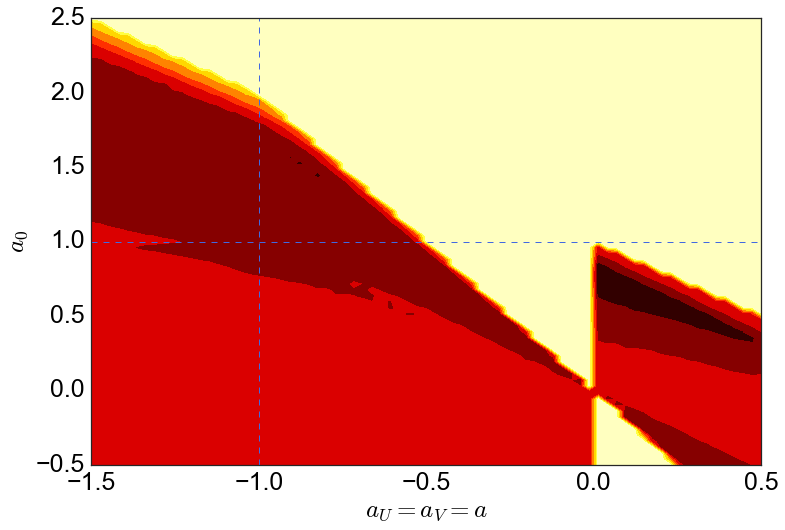

In [16]:
# print pureff_CC1p0pi
fig,ax=plt.subplots(figsize=(12,8))
X,Y = np.meshgrid(a_xy_array,a_0_array)
plt.contourf( X , Y , pureff_CC1p0pi.T , cmap='hot_r' )
Xmax = -1.
Ymax = 1.
plt.plot([Xmax,Xmax],ax.get_ylim(),'--',color='royalblue',linewidth=1)
plt.plot(ax.get_xlim(),[Ymax,Ymax],'--',color='royalblue',linewidth=1)
# plt.colorbar()
set_axes(ax,'$a_U=a_V=a$','$a_0$',do_add_grid=True)
plt.savefig(figures_path+'cut_optimization_axy_a0.pdf')

1819.9403021413416

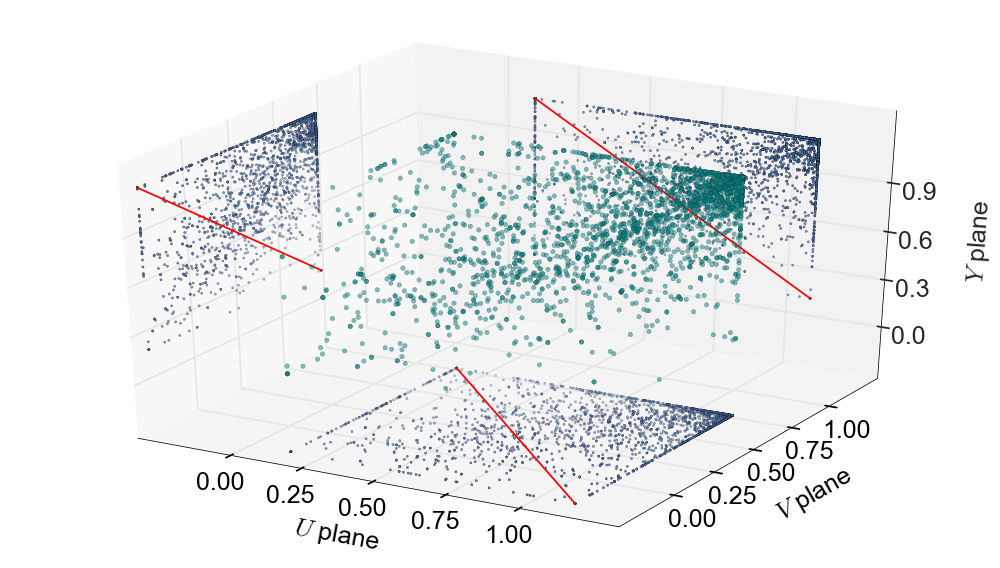

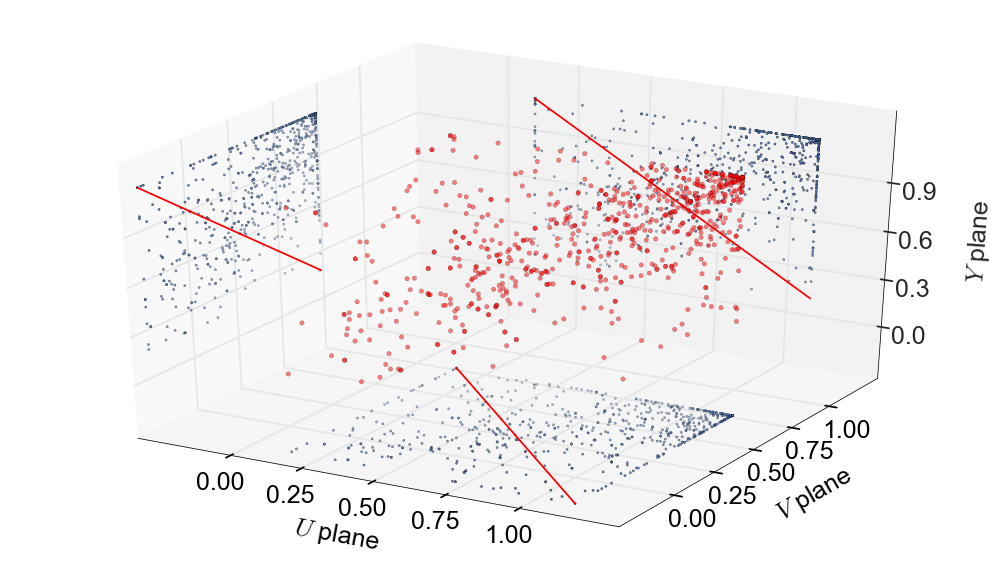

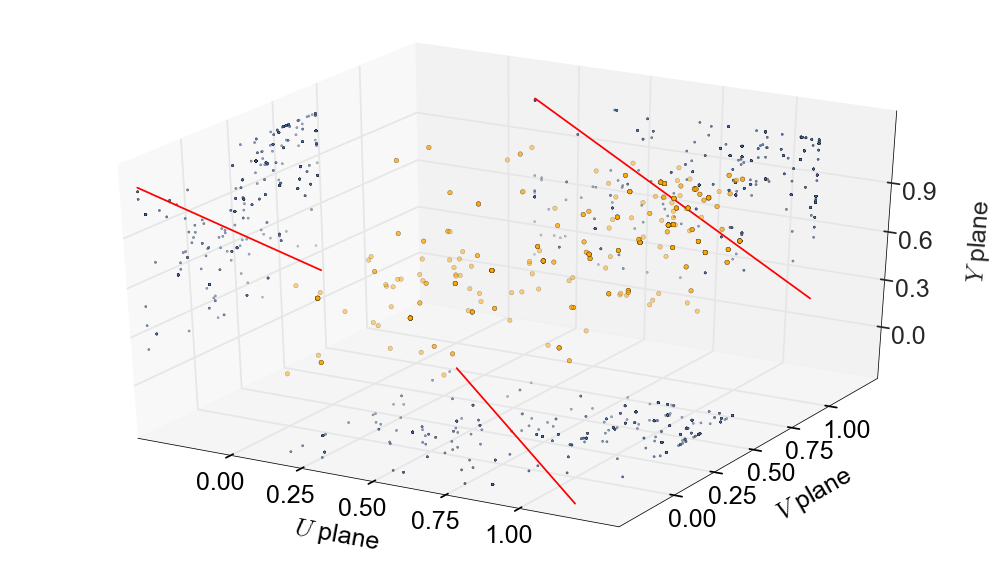

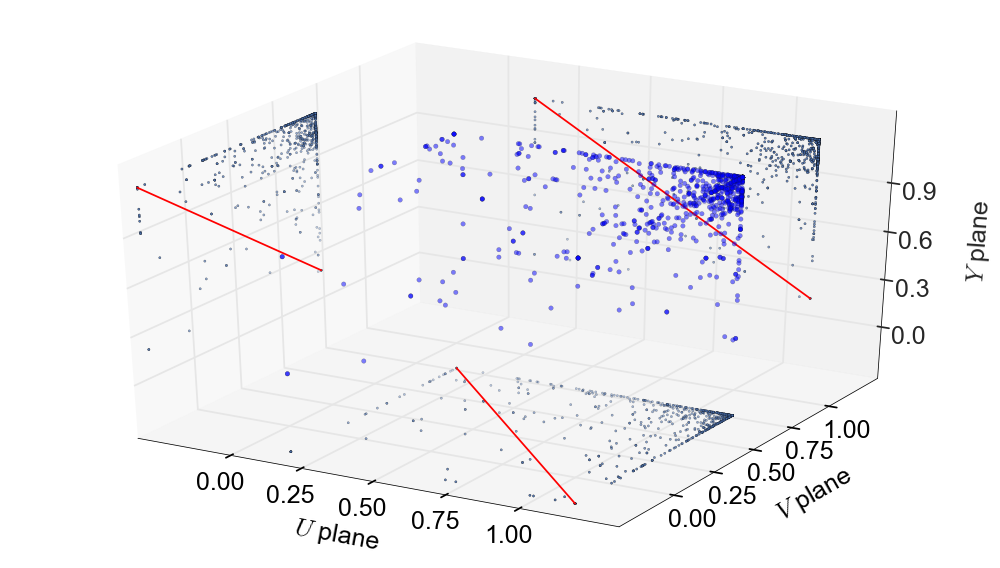

In [17]:
for i_pair_type in range(4):
    pair_type = pair_types[i_pair_type]; color=colors[i_pair_type]; label=labels[i_pair_type]; sample = samples[pair_type]     
    x, y, z = RdQ_xyz[pair_type]
    fig3D = plt.figure(figsize=(14,8)).gca(projection='3d')
    fig3D.scatter( x , y , z , c=color, s=20 , alpha=0.5 )
    fig3D.scatter(x, z, color=color, zdir='y', s=5, zs=1.5 , edgecolors='black') 
    fig3D.scatter(y, z, color=color, zdir='x', s=5, zs=-0.5 , edgecolors='black')
    fig3D.scatter(x, y, color=color, zdir='z', s=5, zs=-0.5 , edgecolors='black')
    
    fig3D.set_xlim(-0.3,1.3);fig3D.set_ylim(-0.3,1.3);fig3D.set_zlim(-0.3,1.3)
    set_axes(fig3D,x_label='$U$ plane',y_label='$V$ plane',z_label='$Y$ plane'
             ,xticks=[0,0.25,0.5,0.75,1],yticks=[0,0.25,0.5,0.75,1],zticks=[0,0.3,0.6,0.9])
    fig3D.xaxis.labelpad = 30 ; fig3D.yaxis.labelpad = 30 ; fig3D.zaxis.labelpad = 30
    plt.tight_layout()
    # optimal cut
    a_x=-1 ; a_y=a_x ; a_0=1.0
    # --- - - -- --- - -- --- 
    draw_plane_projections(axes=fig3D , a_x=a_x , a_y=a_y , a_0=a_0,color='red')
    plt.savefig(figures_path + 'ChosenBoxDimensions_pairtype_%d.pdf'%i_pair_type)
pureff_above_RdQ_plane(a_x=a_x , a_y=a_y , a_0=a_0, i_optimal_box_size=i_optimal_box_size )    

a_x, a_y, a_0: 0.1 0.1 0.7
pur_CC1p0pi,eff_CC1p0pi,(eff_CC1p0pi*pur_CC1p0pi): 36.578581363 63.9384116694 2338.77639347


2338.77639346923

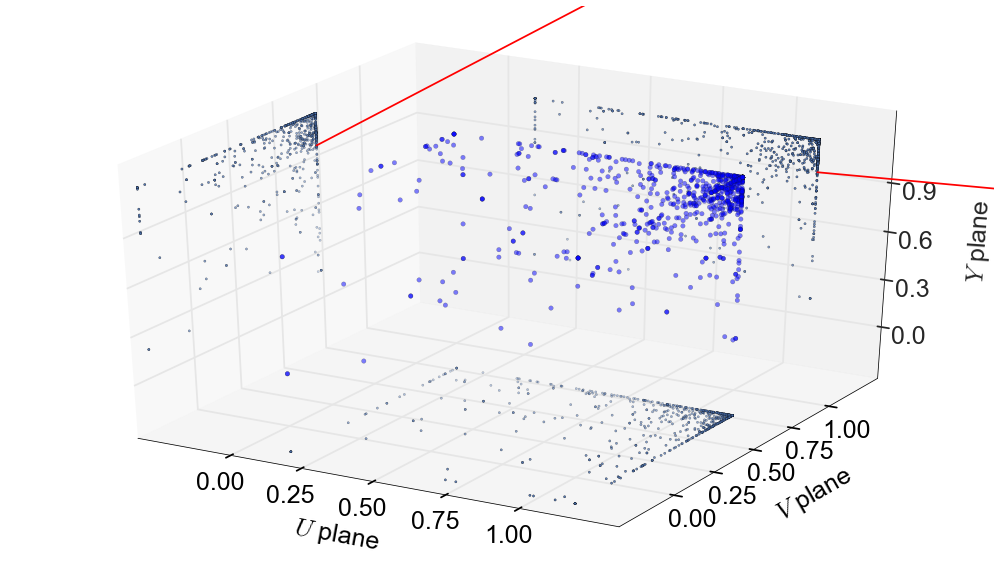

In [37]:
for i_pair_type in range(3,4):
    pair_type = pair_types[i_pair_type]; color=colors[i_pair_type]; label=labels[i_pair_type]; sample = samples[pair_type]     
    x, y, z = RdQ_xyz[pair_type]
    fig3D = plt.figure(figsize=(14,8)).gca(projection='3d')
    fig3D.scatter( x , y , z , c=color, s=20 , alpha=0.5 )
    fig3D.scatter(x, z, color=color, zdir='y', s=5, zs=1.5 , edgecolors='black') 
    fig3D.scatter(y, z, color=color, zdir='x', s=5, zs=-0.5 , edgecolors='black')
    fig3D.scatter(x, y, color=color, zdir='z', s=5, zs=-0.5 , edgecolors='black')
    
    fig3D.set_xlim(-0.3,1.3);fig3D.set_ylim(-0.3,1.3);fig3D.set_zlim(-0.3,1.3)
    set_axes(fig3D,x_label='$U$ plane',y_label='$V$ plane',z_label='$Y$ plane'
             ,xticks=[0,0.25,0.5,0.75,1],yticks=[0,0.25,0.5,0.75,1],zticks=[0,0.3,0.6,0.9])
    fig3D.xaxis.labelpad = 30 ; fig3D.yaxis.labelpad = 30 ; fig3D.zaxis.labelpad = 30
    plt.tight_layout()    
    # look at the impact of a cut on a plane
    # RdQ(Y) = a_0 + a_x * RdQ(U) + a_y * RdQ(V)
#     a_x=0.1 ; a_y=a_x ; a_0=0.7
#     draw_plane_projections(axes=fig3D , a_x=a_x , a_y=a_y , a_0=a_0,color='red')
    RuMin = RvMin = 0.9
    RyMin = 0.9
    draw_plane_projections_box(axes=fig3D , a_x=a_x , a_y=a_y , a_0=a_0,color='red')

pureff_above_RdQ_plane(a_x=a_x , a_y=a_y , a_0=a_0, i_optimal_box_size=i_optimal_box_size , debug=1 )